In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from labellines import labelLine, labelLines


In [94]:
concepts = [x for x in pd.read_csv('../data/mortality_and_oasis_train.csv',nrows=0).columns if 'day' not in x and 'Unnamed' not in x and x!='TEXT']
# concepts = [x for x in pd.read_csv('../data/mortality_and_oasis_train.csv',nrows=0).columns if 'Unnamed' not in x and x!='TEXT']

In [95]:
aucs = []
f1s=[]
for i in range(100):
    try:
        path = 'checkpoints/distilbert_mortality_and_OASIS_'+str(i)+'scores.csv'
#         path = 'checkpoints/distilbert_mortality_and_OASIS_and_weekday_weighted'+str(i)+'scores.csv'
        scores_df = pd.read_csv(path)
#         print(scores_df)
#         aucs.append(scores_df['aucs'].iloc[-1])
        f1s.append(list(scores_df.iloc[2,1:len(concepts)+1]))
    except:
        pass

In [96]:
# (scores_df.iloc[2,1:len(concepts)+1])
# scores_df

In [97]:
aucs = np.array([eval(x) for x in aucs])
f1s = np.array(f1s)


[None, None, None, None, None, None, None, None, None, None, None]

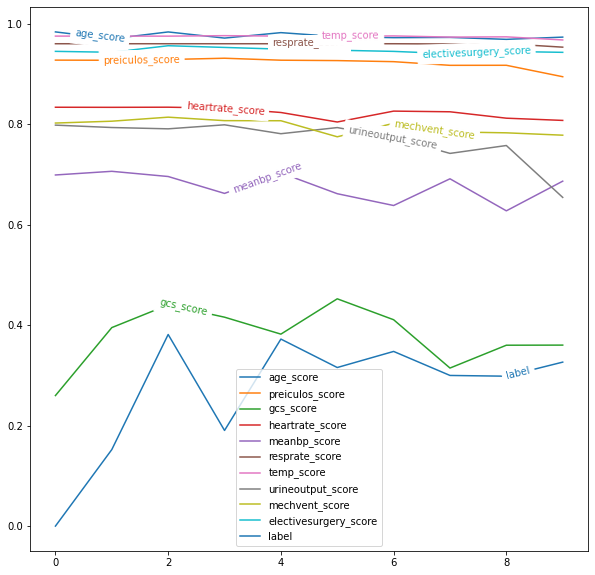

In [98]:
plt.figure(figsize=(10,10))
for i,concept in enumerate(concepts):
    f1s[:,i]
    plt.plot(list(range(f1s.shape[0])), f1s[:,i],label=concept)
    plt.legend()
    
labelLines(plt.gca().get_lines(), zorder=2.5)


In [99]:
max(f1s[:,-1])

0.3815789473684211